In [ ]:
%load_ext autoreload

In [1]:

%matplotlib inline
from matplotlib import pylab as plt
from scipy import linalg
from scipy import stats
import numpy as np
import cleaner
from collections import namedtuple


In [2]:
geom = cleaner.load_camera_geometry(cam_id=1)
g2 = cleaner.make_rectangular_camera_geometry()

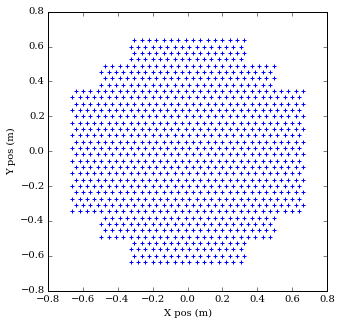

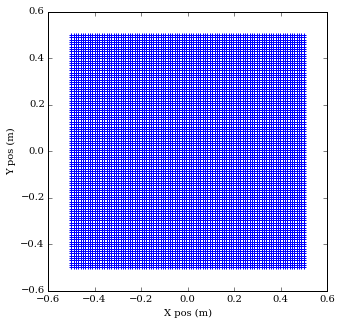

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(geom.pix_x,geom.pix_y, marker="+")
plt.xlabel("X pos ({})".format(geom.pix_x.unit))
plt.ylabel("Y pos ({})".format(geom.pix_y.unit))

plt.figure(figsize=(5,5))
plt.scatter(g2.pix_x,g2.pix_y, marker="+")
plt.xlabel("X pos ({})".format(g2.pix_x.unit))
plt.ylabel("Y pos ({})".format(g2.pix_y.unit))


In [11]:
from scipy.stats import multivariate_normal
width=0.1
length=1.0
phi=np.radians(30)
rotation = np.array([[np.cos(phi), -np.sin(phi)], 
                      [np.sin(phi),  np.cos(phi)]])
print(rotation)
cov_aligned = np.array([[width,0],[0,length]])
cov = rotation.dot(cov_aligned).dot(rotation.T) # C' = R C R+
print(cov)
gauss2d = multivariate_normal(mean=[0,0.5], cov=cov)


[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]
[[ 0.325      -0.38971143]
 [-0.38971143  0.775     ]]


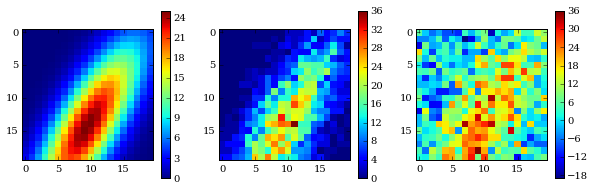

In [12]:
xx = np.linspace(-1,1,20)
yy = np.linspace(-1,1,20)
X,Y = np.meshgrid(xx,yy)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

pedlevel = 50.0
intensity = 50

showerpdf = gauss2d.pdf(pos)*intensity
signal = np.random.poisson( showerpdf )
noise = np.random.poisson(pedlevel, size=signal.shape)

plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.imshow(showerpdf, interpolation='none')
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(signal, interpolation='none')
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(signal+noise-pedlevel, interpolation='none')
plt.colorbar()


In [13]:
pos2 = np.column_stack( [posx, posy] )
signal = np.random.poisson(gauss2d.pdf(pos2)*100) 
noise = np.random.poisson(10, size=len(signal)) 
image = signal + noise

NameError: name 'posx' is not defined

In [4]:
1/0

ZeroDivisionError: division by zero

In [5]:
%debug

> <ipython-input-4-05c9758a9c21>(1)<module>()
----> 1 1/0

ipdb> x
*** NameError: name 'x' is not defined
ipdb> exit
